In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def f(x):
    return 4*x**2 - 3*x + 2

print (f(2))

12


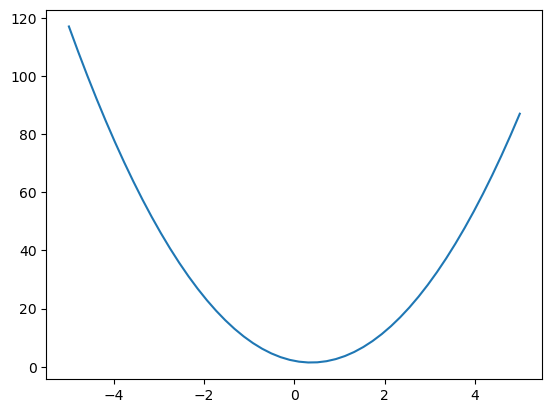

In [3]:
xs = np.linspace(-5, 5)
ys = f(xs)

plt.plot(xs, ys)

In [4]:
class Value:

    def __init__(self, data, _children = (), _op = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op

    def __repr__(self):
        return f'Value(data={self.data})'

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

a = Value(2.0)
b = Value (-3.0)
c = Value (10.0)

d = a*b + c

In [5]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [6]:
d._op

'+'

In [16]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={'rankdir': "LR"}) #LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        #for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{data %.4f }" % (n.data, ), shape="record")
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label=n._op)
            # connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot    

Value(data=2.0)
Value(data=-6.0)
Value(data=-3.0)
Value(data=4.0)
Value(data=10.0)


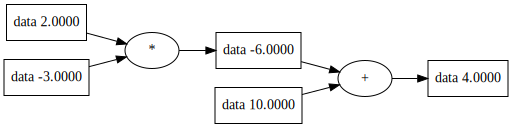

In [17]:
draw_dot(d)


Value(data=10.0)
Value(data=4.0)


Value(data=-6.0)
Value(data=4.0)


Value(data=2.0)
Value(data=-6.0)


Value(data=-3.0)
Value(data=-6.0)




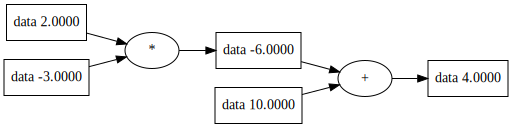

In [20]:
def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={'rankdir': "LR"}) #LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        #for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{data %.4f }" % (n.data, ), shape="record")
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label=n._op)
            # connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        print (n1)
        print (n2)
        print ("\n")
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot    

draw_dot(d)
